# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [78]:
new_cols = [col.lower() for col in df.columns]
#set equal to df.columns if you want the change to take place
new_cols

df.columns = map(str.lower, df.columns)
df.head()

,index,linename,unit,scp,station,date,time,desc,entries,exits,num_lines,day_of_week,weekend_weekday
Day_Of_Week,,,,,,,,,,,,,
5,0,NQR456W,R051,02-00-00,59 ST,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5,True
5,1,NQR456W,R051,02-00-00,59 ST,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5,True
5,2,NQR456W,R051,02-00-00,59 ST,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,5,True
5,3,NQR456W,R051,02-00-00,59 ST,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,5,True
5,4,NQR456W,R051,02-00-00,59 ST,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,5,True


# Change the Index to be the Line Names

In [4]:
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [10]:
df = df.reset_index() #Not that painful
df.head()

,index,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines
0,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [40]:
df['Num_Lines'] = df.Linename.map(lambda x: len(x))
df.head()

,index,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,Day
0,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday


## Write a function to clean a column name.

In [7]:
def clean(col_name):
    cleaned = col_name.strip().title()
    #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [8]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [9]:
#Checking the output, we can see the results.
df.columns

Index(['Linename', 'C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries', 'Exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

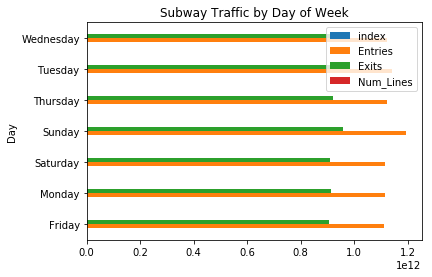

In [53]:
#date to day 
pd.to_datetime(df.Date,format='%m/%d/%Y').head()
df.Date=pd.to_datetime(df.Date)
df['Day']=df.Date.dt.day_name()
df = df.set_index('Day')
df.head()

    
grouped = df.groupby('Day').sum()
grouped.plot(kind='barh', title='Subway Traffic by Day of Week')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

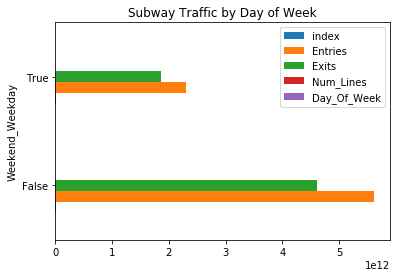

In [77]:
#Your code here
df.reset_index()
pd.to_datetime(df.Date,format='%m/%d/%Y').head()
df.Date=pd.to_datetime(df.Date)
df['Day_Of_Week']=df.Date.dt.dayofweek
df.head()

def weekend(text):
    if Day_Of_Week>=5:
        return True
    else:
        return False
df['Weekend_Weekday']=df.Day_Of_Week.map(lambda x:x>=5)
df.head()

grouped = df.groupby('Weekend_Weekday').sum()
grouped.plot(kind='barh', title='Subway Traffic by Day of Week')

# Drop a couple of columns

In [67]:
df.drop(['C/A','Division'],axis=1)

,index,Linename,Unit,Scp,Station,Date,Time,Desc,Entries,Exits,Num_Lines
Day,,,,,,,,,,,
Saturday,0,NQR456W,R051,02-00-00,59 ST,2018-08-25,00:00:00,REGULAR,6736067,2283184,7
Saturday,1,NQR456W,R051,02-00-00,59 ST,2018-08-25,04:00:00,REGULAR,6736087,2283188,7
Saturday,2,NQR456W,R051,02-00-00,59 ST,2018-08-25,08:00:00,REGULAR,6736105,2283229,7
Saturday,3,NQR456W,R051,02-00-00,59 ST,2018-08-25,12:00:00,REGULAR,6736180,2283314,7
Saturday,4,NQR456W,R051,02-00-00,59 ST,2018-08-25,16:00:00,REGULAR,6736349,2283384,7
